In [575]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [ ]:
num_queries = 0

In [422]:
def VLBZ(ar,num,Pe,p):
    # Variable Length BZ Algorithm
    # takes input array ar, tolerated prob Pe, and crossover prob p
    
    # appending -inf and inf to ends of array
    ar = np.insert(ar,0,-100000000)
    ar = np.append(ar,100000000)
    
    #  k = current step
    k = 0
    n = len(ar)
    
    # base case condition
    if(n==1):
        return 0 if num<ar[0] else 1
    
    # pdf of intervals and Z_k[i]
    q = np.ones(n)/n
    Z = 1/(1-q)
    
    # The algorithms terminates at M˜ th iteration, where M˜ is the smallest integer such that Z_M(i) ≥ − log(Pe)
    while np.max(Z)<=math.log2(1/Pe):
        k = k + 1
        sum = 0
        j = -1
        
        while sum<=0.5:
            j = j + 1
            sum = sum + q[j]
        
        # calculating j_star from j
        t1 = 2*(1-sum+q[j]-0.5)
        t2 = 2*(sum-0.5)
        pi1 = (rho(t2,p)-rho(-t2,p))/(rho(t1,p)-rho(-t1,p)+rho(t2,p)-rho(-t2,p))
        ch = (random.random()<pi1)
        sub = 1 if ch else 0
        j_star = j - sub
        
        # calculating t(k) for updating q
        t = 2*(sum-q[j])-1 if j_star==j-1 else 2*(sum)-1
        
        # giving U_k = ar[j_star] and recieving noisy output Y
        Y = 1 if ar[j_star]<num else 0
        N = 1 if random.random()<p else 0
        Y = Y ^ N
        
        # updating q - prob distribution of intervals
        f1 = np.ones(n)
        for i in range(n):
            f1[i] = (2*(1-p)*q[i])/(1+(1-2*Y)*(1-2*p)*(t))
        for i in range(n):
            if Y==(j_star<i):
                q[i] = f1[i]
            else:
                q[i] = p*f1[i]/(1-p)
                
        # updating Z_k
        Z = q/(1-q)
        
    l = np.argmax(q)
    return l-1

def rho(x,p):
    ans = (1-p)*math.log2(1+(1-2*p)*x) + p*math.log2(1-(1-2*p)*x)
    return ans

In [385]:
def VL_NoisySorting(ar,Pe,p):
    n = len(ar)
    sigma = np.ones(1)*ar[n-1]
    # print(sigma)
    for i in range(2,n+1):
        num = ar[n-i]
        l = VLBZ(sigma,num,Pe/n,p)
        sigma = np.concatenate((sigma[0:l],np.array([num]),sigma[l:]))
        # print('l = ',l)
        # print('concatenating : ',sigma[0:l],np.array([num]),sigma[l:])
        # print(sigma)
    
    return sigma

In [368]:
def mergeSort(arr, n):
    temp_arr = [0]*n
    return _mergeSort(arr, temp_arr, 0, n-1)
 
 
 
def _mergeSort(arr, temp_arr, left, right): 
    inv_count = 0
 
    if left < right:
        mid = (left + right)//2
        inv_count += _mergeSort(arr, temp_arr, left, mid)
        inv_count += _mergeSort(arr, temp_arr, mid + 1, right)
        inv_count += merge(arr, temp_arr, left, mid, right)
    return inv_count
 
def merge(arr, temp_arr, left, mid, right):
    i = left     # Starting index of left subarray
    j = mid + 1  # Starting index of right subarray
    k = left     # Starting index of to be sorted subarray
    inv_count = 0
    while i <= mid and j <= right:
        if arr[i] <= arr[j]:
            temp_arr[k] = arr[i]
            k += 1
            i += 1
        else:
            temp_arr[k] = arr[j]
            inv_count += (mid-i + 1)
            k += 1
            j += 1
 
    while i <= mid:
        temp_arr[k] = arr[i]
        k += 1
        i += 1
 
    while j <= right:
        temp_arr[k] = arr[j]
        k += 1
        j += 1
 
    for loop_var in range(left, right + 1):
        arr[loop_var] = temp_arr[loop_var]
 
    return inv_count


In [265]:
print('Outputs for some trivial cases : ')
print('ans = ',str(VLBZ([1,3,8,12],0,0.1,0.3)),' expected =',0)
print('ans = ',str(VLBZ([1,3,8,12],2,0.1,0.3)),' expected =',1)
print('ans = ',str(VLBZ([1,3,8,12],6,0.1,0.3)),' expected =',2)
print('ans = ',str(VLBZ([1,3,8,12],10,0.1,0.3)),' expected =',3)
print('ans = ',str(VLBZ([1,3,8,12],16,0.1,0.3)),' expected =',4)


Outputs for some trivial cases : 
ans =  0  expected = 0
ans =  1  expected = 1
ans =  2  expected = 2
ans =  3  expected = 3
ans =  4  expected = 4


In [434]:
def test_VLBZ_NoisySorting(N,a,b,Pe,p):
    # tests the VLBZ Noisy Sorting algo by on N-length random array of numbers [a,b]
    ar = np.random.randint(a, b + 1, size=N) # generating the random array

    br = (VL_NoisySorting(ar,Pe,p))
    br = np.floor(br).astype(int) 
    n = len(br)
    # print('original array : \t',np.array(ar))
    # print('sorted array : \t\t',br)
    num_inversions = mergeSort(br,n)
    inversion_fraction = round(num_inversions/(n*(n-1)/2),4)
    print('inversion percentage : ',inversion_fraction*100,'%')
    return inversion_fraction



In [528]:
def save_observations(N,a,b,Pe,p,res):
    file1 = open('./results.txt','a')
    file1.write(str(N)+'\t\t'+str(Pe)+'\t\t'+str(p)+'\t\t'+str(a)+'\t\t'+str(b)+'\t\t'+str(res)+'\n')
    file1.close()

In [593]:
def extract_columns_to_lists(filename, column_a, column_b):
    # Initialize lists to store column a and column b values
    X = []
    Y = []

    try:
        # Open the file and read its contents
        with open(filename, 'r') as file:
            # Skip the first row (header)
            next(file)

            # Iterate through the remaining lines
            for line in file:
                # Split the line into values based on whitespace or tabs
                values = line.strip().split('\t\t')

                # Check if the line has enough columns
                if len(values) > max(column_a, column_b):
                    # Append the values from the specified columns to their respective lists
                    X.append(values[column_a])
                    Y.append(values[column_b])

    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        return
    
    X = [float(x) for x in X]
    Y = [float(y) for y in Y]

    
    X_interp = np.linspace(min(X), max(X), 100)  # Create a range of X values for interpolation
    Y_interp = np.interp(X_interp, X, Y)  # Interpolate Y values for the new X values

    # Create a continuous plot
    plt.figure(figsize=(8, 4))
    plt.plot(X_interp, Y_interp, linestyle='-', markersize=5)
    plt.xlabel('N')
    plt.ylabel('Error_Probability')
    plt.title('Plot of Error_prob with respect to N (Interpolated)')
    plt.grid(True)

    # Show the plot
    plt.show()




In [526]:
N = 450 # length of ar to be generated randomly
a,b = 1,10000 # range of numbers in the array [a,b]
Pe = 0.01 # error probability tolerated for each VLBZ * n
p = 0.20 # crossover probability

res = test_VLBZ_NoisySorting(N,a,b,Pe,p)
save_observations(N,a,b,Pe,p,res)

inversion percentage :  0.38 %


In [567]:
N = 10
a,b = 1,10000 # range of numbers in the array [a,b]
Pe = 0.01 # error probability tolerated for each VLBZ * n
p = 0.20 # crossover probability

while N<=100:
    res = test_VLBZ_NoisySorting(N,a,b,Pe,p)
    save_observations(N,a,b,Pe,p,res)
    N = N + 10
    

inversion percentage :  0.0 %
inversion percentage :  0.53 %
inversion percentage :  0.0 %
inversion percentage :  0.26 %
inversion percentage :  0.16 %
inversion percentage :  1.3 %
inversion percentage :  0.08 %
inversion percentage :  2.69 %
inversion percentage :  0.1 %
inversion percentage :  1.8399999999999999 %


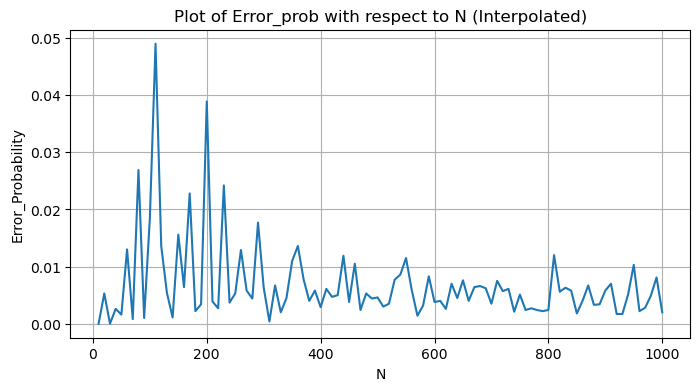

In [594]:
extract_columns_to_lists('results.txt',0,5)